# Data Science Project

# Data Scraping

In [6]:
%pip install ntscraper

In [7]:
import pandas as pd
from ntscraper import Nitter

In [8]:
scraper = Nitter()

Testing instances: 100%|██████████| 31/31 [00:44<00:00,  1.45s/it]


In [10]:
terms = ["Data Science", "DataScience"]
tweets = scraper.get_tweets(terms, mode='term', number=5000)

INFO:root:No instance specified, using random instance https://n.opnxng.com
INFO:root:No instance specified, using random instance https://nitter.moomoo.me
INFO:root:Current stats for DataScience: 10 tweets, 0 threads...
INFO:root:Current stats for Data Science: 11 tweets, 0 threads...
INFO:root:Current stats for DataScience: 22 tweets, 0 threads...
INFO:root:Current stats for Data Science: 21 tweets, 0 threads...
INFO:root:Current stats for DataScience: 33 tweets, 0 threads...
INFO:root:Current stats for DataScience: 48 tweets, 0 threads...
INFO:root:Current stats for Data Science: 36 tweets, 0 threads...
INFO:root:Current stats for DataScience: 57 tweets, 0 threads...
INFO:root:Current stats for Data Science: 50 tweets, 0 threads...
INFO:root:Current stats for DataScience: 69 tweets, 0 threads...
INFO:root:Current stats for Data Science: 63 tweets, 0 threads...
INFO:root:Current stats for DataScience: 79 tweets, 0 threads...
INFO:root:Current stats for DataScience: 89 tweets, 0 threa

In [20]:
scrapped_tweets = []

In [19]:
len(tweets[1]["tweets"])

584

In [21]:
# iterate over tweets for extracting information that we need
for tweet_tab in tweets:
  for tweet in tweet_tab["tweets"]:
      data = [tweet["date"], tweet["user"]["username"], tweet["text"], tweet["stats"]["likes"], tweet["stats"]["comments"]]
      scrapped_tweets.append(data)

In [22]:
# data to dataframe
tweet_df = pd.DataFrame(scrapped_tweets, columns=["date", "username", "text", "likes", "comments"])
tweet_df.head()

,date,username,text,likes,comments
0,"Jan 18, 2024 · 4:11 AM UTC",@Harsa_Dash,Developers Huge Road Maps Collections🔥 Just f...,274,256
1,"Jan 17, 2024 · 5:06 AM UTC",@atulkumarzz,Are you struggling for paying huge amount on p...,695,695
2,"Jan 17, 2024 · 3:13 PM UTC",@clcoding,Duke University is offering FREE courses 🔥 💻 ...,1271,5
3,"Jan 18, 2024 · 10:08 AM UTC",@BioSScotland,🚨 Last chance to apply! 🚨 This job advert clos...,0,0
4,"Jan 18, 2024 · 10:04 AM UTC",@_IBSConsulting,"Thinking of taking a Data Science, Cybersecuri...",3,1


In [24]:
# save for the further use
tweet_df.to_csv("tweets.csv", index=False)

# Preprocess Data

In [25]:
# read data from csv
df = pd.read_csv("tweets.csv")
df.head()

,date,username,text,likes,comments
0,"Jan 18, 2024 · 4:11 AM UTC",@Harsa_Dash,Developers Huge Road Maps Collections🔥 Just f...,274,256
1,"Jan 17, 2024 · 5:06 AM UTC",@atulkumarzz,Are you struggling for paying huge amount on p...,695,695
2,"Jan 17, 2024 · 3:13 PM UTC",@clcoding,Duke University is offering FREE courses 🔥 💻 ...,1271,5
3,"Jan 18, 2024 · 10:08 AM UTC",@BioSScotland,🚨 Last chance to apply! 🚨 This job advert clos...,0,0
4,"Jan 18, 2024 · 10:04 AM UTC",@_IBSConsulting,"Thinking of taking a Data Science, Cybersecuri...",3,1


In [26]:
# removing · and UTC for converting date to datetime format
df["date"] = df["date"].str.replace("·", "")
df["date"] = df["date"].str.replace("UTC", "")

# converting date to datetime format
df["date"] = pd.to_datetime(df["date"])
print(df["date"].dtype)
print()
df.head()

datetime64[ns]



,date,username,text,likes,comments
0,2024-01-18 04:11:00,@Harsa_Dash,Developers Huge Road Maps Collections🔥 Just f...,274,256
1,2024-01-17 05:06:00,@atulkumarzz,Are you struggling for paying huge amount on p...,695,695
2,2024-01-17 15:13:00,@clcoding,Duke University is offering FREE courses 🔥 💻 ...,1271,5
3,2024-01-18 10:08:00,@BioSScotland,🚨 Last chance to apply! 🚨 This job advert clos...,0,0
4,2024-01-18 10:04:00,@_IBSConsulting,"Thinking of taking a Data Science, Cybersecuri...",3,1


In [27]:
# removing non-english characters and without punctuations
df["text"] = df["text"].str.replace('[^a-zA-Z.,!?;:\'"(){}\[\]\- ]', '')
df.head()

<ipython-input-27-d39052fdfc07>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["text"] = df["text"].str.replace('[^a-zA-Z.,!?;:\'"(){}\[\]\- ]', '')


,date,username,text,likes,comments
0,2024-01-18 04:11:00,@Harsa_Dash,Developers Huge Road Maps Collections Just fo...,274,256
1,2024-01-17 05:06:00,@atulkumarzz,Are you struggling for paying huge amount on p...,695,695
2,2024-01-17 15:13:00,@clcoding,Duke University is offering FREE courses Co...,1271,5
3,2024-01-18 10:08:00,@BioSScotland,Last chance to apply! This job advert closes...,0,0
4,2024-01-18 10:04:00,@_IBSConsulting,"Thinking of taking a Data Science, Cybersecuri...",3,1


In [28]:
# removing @ from the username for clear visualization
df["username"] = df["username"].str.replace("@", "")
df.head()

,date,username,text,likes,comments
0,2024-01-18 04:11:00,Harsa_Dash,Developers Huge Road Maps Collections Just fo...,274,256
1,2024-01-17 05:06:00,atulkumarzz,Are you struggling for paying huge amount on p...,695,695
2,2024-01-17 15:13:00,clcoding,Duke University is offering FREE courses Co...,1271,5
3,2024-01-18 10:08:00,BioSScotland,Last chance to apply! This job advert closes...,0,0
4,2024-01-18 10:04:00,_IBSConsulting,"Thinking of taking a Data Science, Cybersecuri...",3,1


In [29]:
# remove duplicate tweets
print("Before removing duplicates: ", df.shape)
df.drop_duplicates(subset="text", inplace=True)
print("After removing duplicates: ", df.shape)


Before removing duplicates:  (5584, 5)
After removing duplicates:  (4713, 5)


In [30]:
# remove tweets with less than 15 characters
print("Before removing short tweets: ", df.shape)
df = df[df["text"].str.len() > 15]
print("After removing short tweets: ", df.shape)

Before removing short tweets:  (4713, 5)
After removing short tweets:  (4663, 5)


In [31]:
# remove any missing values
print("Before removing missing values: ", df.shape)
df.dropna(inplace=True)
print("After removing missing values: ", df.shape)

Before removing missing values:  (4663, 5)
After removing missing values:  (4663, 5)


In [32]:
# saving cleaned data for the further use
df.to_csv("cleaned_tweets.csv", index=False)

# Exploring the Dataset

In [33]:
# info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4663 entries, 0 to 5577
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      4663 non-null   datetime64[ns]
 1   username  4663 non-null   object        
 2   text      4663 non-null   object        
 3   likes     4663 non-null   int64         
 4   comments  4663 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 218.6+ KB


In [34]:
# statistical summary of numerical columns
df.describe()

,likes,comments
count,4663.000000,4663.000000
mean,247.880335,16.276003
std,2971.641346,200.404098
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,6.000000,1.000000
max,126847.000000,8111.000000


In [35]:
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['comments'] = pd.to_numeric(df['comments'], errors='coerce')

# combine 'likes' and 'comments' columns into 'Popularity' column
df['Popularity'] = df['likes'] + df['comments']

# categorize 'Popularity' column into 'Popularity_Category' column
popularityLow = df['Popularity'].quantile(0.25)
popularityHigh = df['Popularity'].quantile(0.75)

df['Popularity_Category'] = pd.cut(
    df['Popularity'],
    bins=[float('-inf'), popularityLow, popularityHigh, float('inf')],
    labels=['Low', 'Medium', 'High']
)

In [36]:
print("Popularity Categories:")
print(df['Popularity_Category'].value_counts())

Popularity Categories:
Medium    1920
Low       1589
High      1154
Name: Popularity_Category, dtype: int64


# Data Visualization and Analysis

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

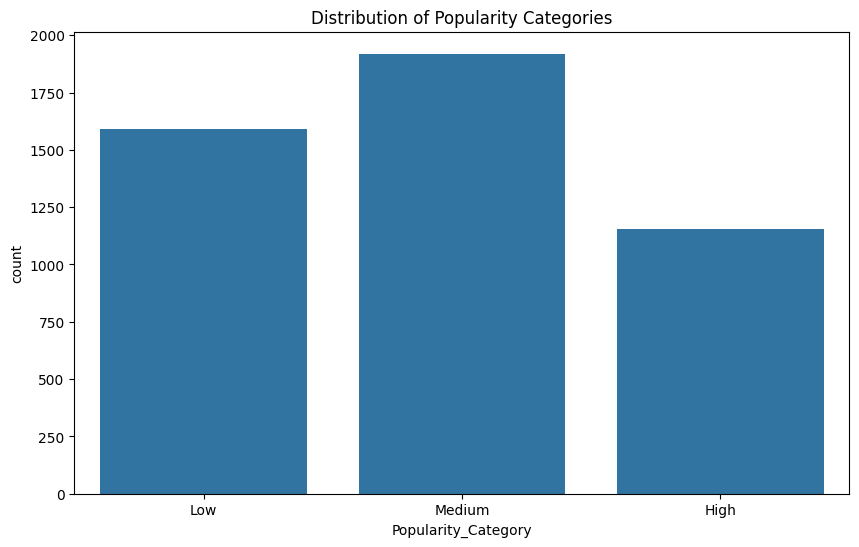

In [38]:
# plotting the distribution of 'Popularity_Category'
plt.figure(figsize=(10, 6))
sns.countplot(x='Popularity_Category', data=df)
plt.title("Distribution of Popularity Categories")
plt.show()


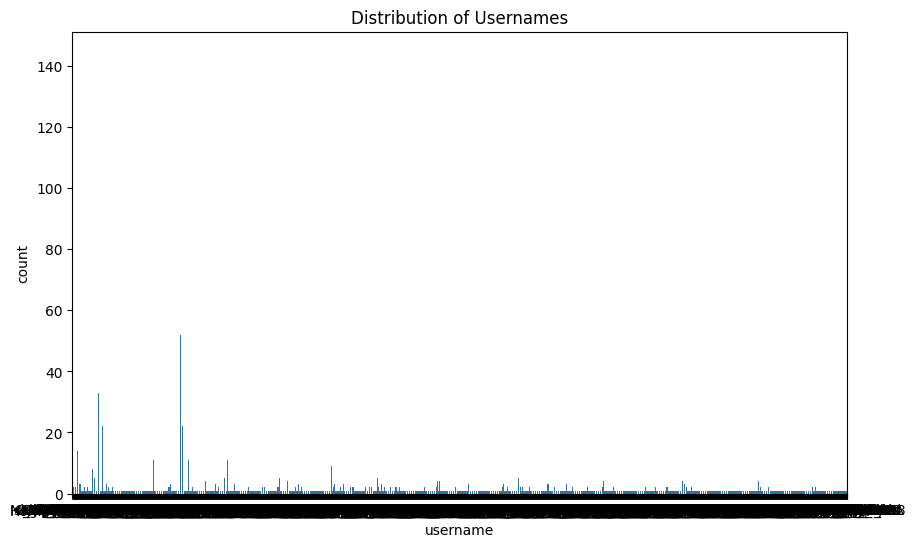

In [39]:
# plotting the distribution of usernames
plt.figure(figsize=(10, 6))
sns.countplot(x='username', data=df)
plt.title("Distribution of Usernames")
plt.show()


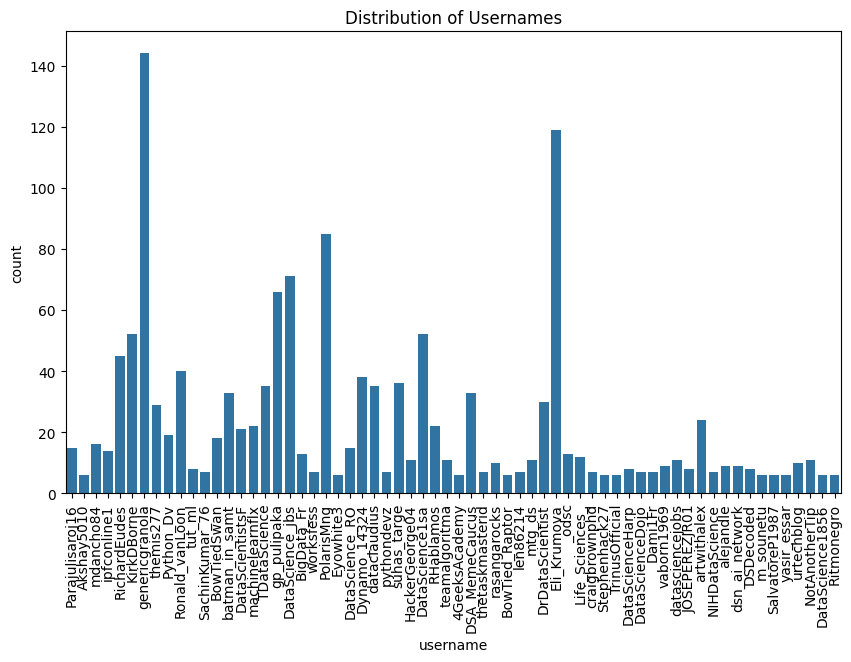

In [40]:
# as we see above some users have more tweets than others
# lets see the distribution of tweets per user who has more than 5 tweets
plt.figure(figsize=(10, 6))
sns.countplot(x='username', data=df[df['username'].map(df['username'].value_counts()) > 5])
plt.title("Distribution of Usernames")
plt.xticks(rotation=90)
plt.show()

In [41]:
# listing the tweet count and usernames who has more than 5 tweets
tweet_counts = df['username'].value_counts()
tweet_counts = tweet_counts[tweet_counts > 5]
tweet_counts

genericgranola     144
Eli_Krumova        119
PolarisMng          85
DataScience_jbs     71
gp_pulipaka         66
                  ... 
SalvatoreP1987       6
m_sounetu            6
Ritmonegro           6
DataScience1856      6
Akshay5010           6
Name: username, Length: 64, dtype: int64

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


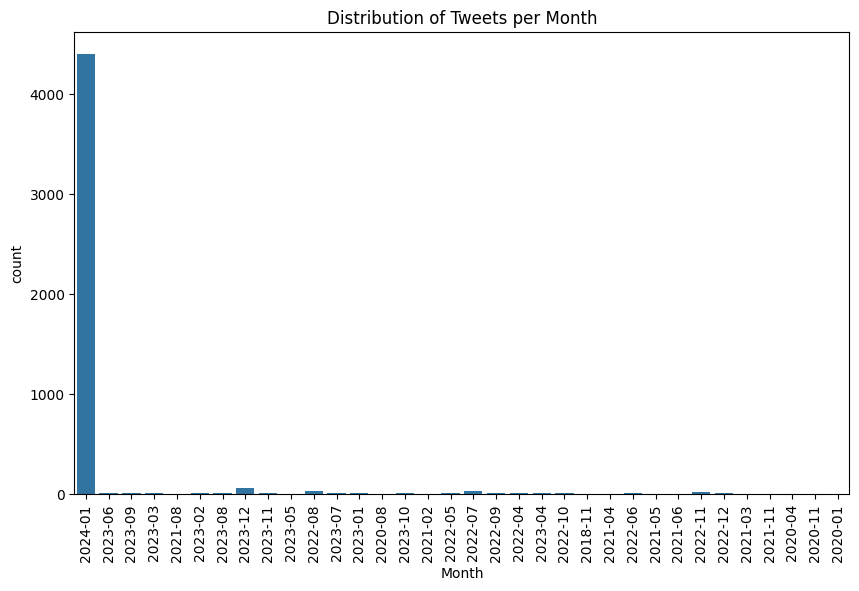

In [44]:
# count of tweets per month-year
df['Month'] = df['date'].dt.strftime('%Y-%m')
df['Month'].value_counts()

# plotting the distribution of tweets per month-year
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df)
plt.title("Distribution of Tweets per Month")
plt.xticks(rotation=90)
plt.show()

In [45]:
# printing the top 10 months with the most tweets
df['Month'].value_counts().head(10)

2024-01    4398
2023-12      57
2022-08      29
2022-07      26
2022-11      18
2022-06      11
2023-06      10
2023-03      10
2023-11      10
2023-08       9
Name: Month, dtype: int64

In [46]:
# grouping by month-year and calculating the average popularity. Listing the top 10 months with the highest average popularity
df.groupby('Month')['Popularity'].mean().sort_values(ascending=False).head(10)

Month
2020-04    8756.000000
2021-08    4549.000000
2020-08    3379.000000
2020-11    2315.000000
2022-11    2227.888889
2023-09    1935.166667
2022-12    1153.666667
2023-10     961.250000
2023-08     826.111111
2022-06     755.272727
Name: Popularity, dtype: float64

As we see in the above, "Data Science" was most popular in 2020-04. We can look at the tweets in that month.

In [48]:
df[df['Month'] == '2020-04']

,date,username,text,likes,comments,Popularity,Popularity_Category,Month
4117,2020-04-07 02:18:00,steak_umm,breaking news and storytelling will always be ...,8733,23,8756,High,2020-04


In [49]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

In [50]:
# most frequent words in the tweets
nltk.download('stopwords')

# removing stopwords
stop = stopwords.words('english')
df['text-withoutstopwords'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# most frequent words
freq = pd.Series(' '.join(df['text-withoutstopwords']).split()).value_counts()[:20]
freq

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


data                      1780
DataScience               1400
Data                      1317
AI                        1265
science                    932
MachineLearning            712
Science                    703
-                          655
Python                     620
.                          611
I                          611
The                        478
Analytics                  408
ML                         406
datascience                390
BigData                    363
ArtificialIntelligence     342
IoT                        273
,                          228
programming                220
dtype: int64

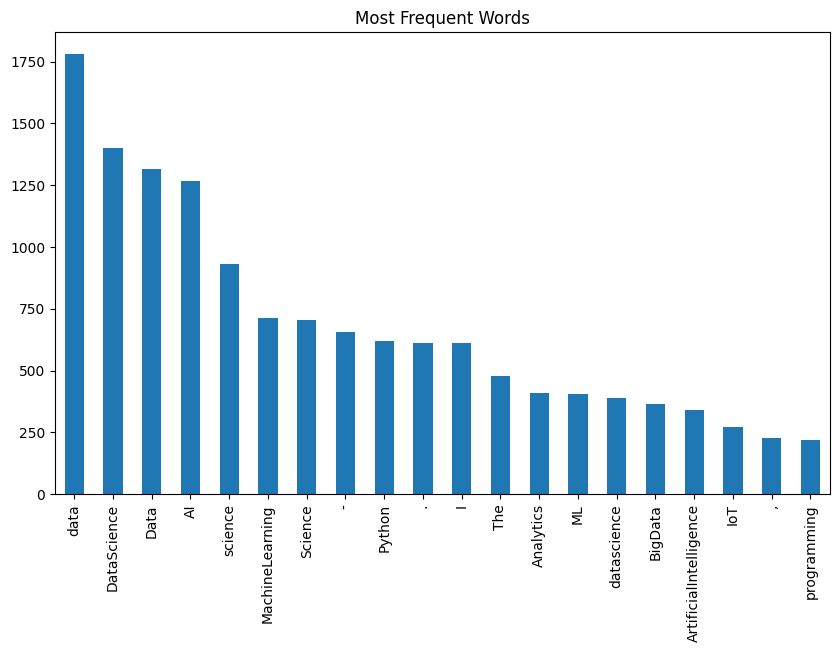

In [51]:
# visualizing the most frequent words
plt.figure(figsize=(10, 6))
freq.plot(kind='bar', title="Most Frequent Words")
plt.show()


In [52]:
# least frequent words in the tweets
least_freq = pd.Series(' '.join(df['text-withoutstopwords']).split()).value_counts()[-20:]
least_freq

E-PSYCHOMETRICS                                                        1
LAB,                                                                   1
Venn                                                                   1
https:www.ethicssage.comhow-we-can-create-a-more-civil-society.html    1
civil:                                                                 1
https:history.aip.orgclimateindex.htm                                  1
bit.lyNnN                                                              1
ABRAMOVICH                                                             1
Roman                                                                  1
DERIPASKA                                                              1
Oleg                                                                   1
PRIGOZHIN                                                              1
Yevgeny                                                                1
AGENCY                                             

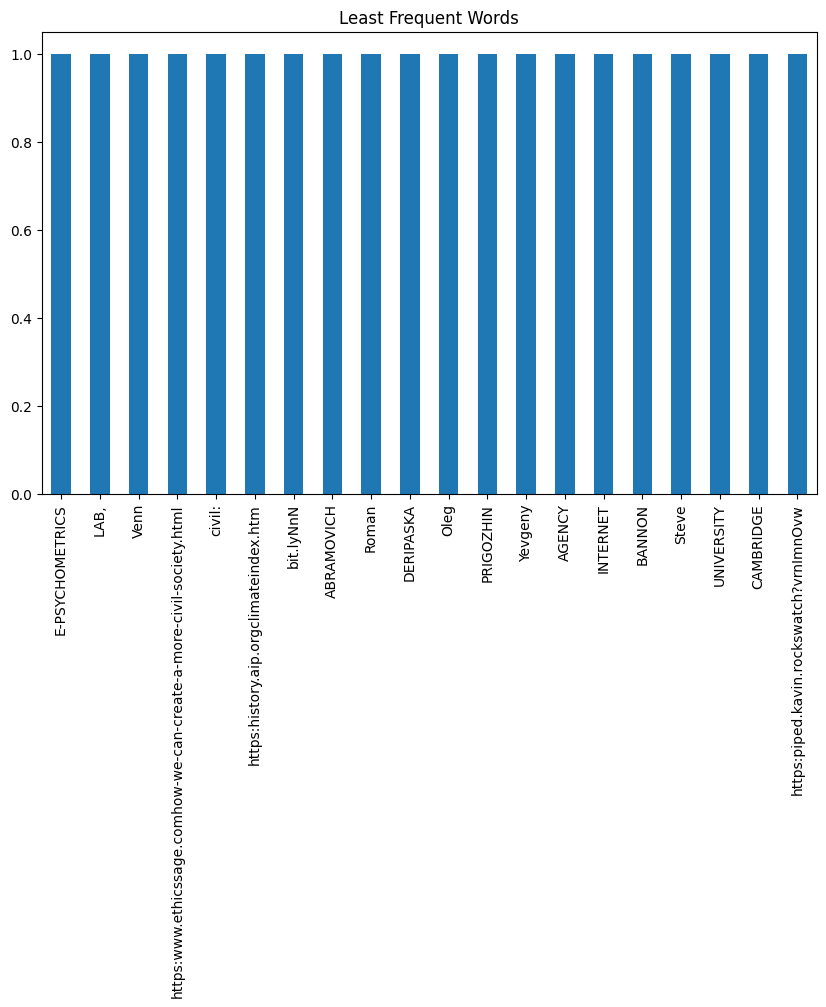

In [53]:
# visualizing the least frequent words
plt.figure(figsize=(10, 6))
least_freq.plot(kind='bar', title="Least Frequent Words")
plt.show()

In [54]:
# most frequent words in the tweets with low popularity
low_pop = df[df['Popularity_Category'] == 'Low']
low_pop_freq = pd.Series(' '.join(low_pop['text-withoutstopwords']).split()).value_counts()[:20]
low_pop_freq

data                      582
DataScience               469
Data                      432
AI                        357
science                   314
MachineLearning           225
Science                   222
-                         203
I                         172
datascience               159
ArtificialIntelligence    153
The                       153
Python                    153
.                         124
via                       102
Analytics                  94
AIML                       90
Trending                   88
Identified                 86
Machine-Driven             86
dtype: int64

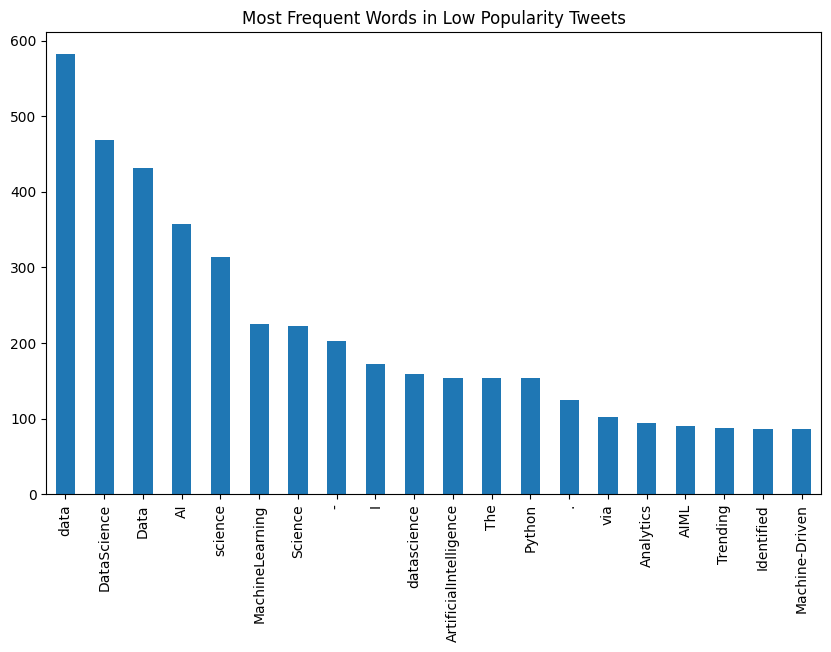

In [55]:
# visualizing the most frequent words in the tweets with low popularity
plt.figure(figsize=(10, 6))
low_pop_freq.plot(kind='bar', title="Most Frequent Words in Low Popularity Tweets")
plt.show()

In [56]:
# most frequent words in the tweets with high popularity
high_pop = df[df['Popularity_Category'] == 'High']
high_pop_freq = pd.Series(' '.join(high_pop['text-withoutstopwords']).split()).value_counts()[:20]
high_pop_freq

data               397
.                  347
Data               346
AI                 337
DataScience        331
Python             238
-                  234
MachineLearning    215
Science            191
I                  183
science            177
Analytics          165
BigData            163
ML                 159
The                148
IoT                144
IIoT               130
programming        112
IoTPL              105
IoTCL               92
dtype: int64

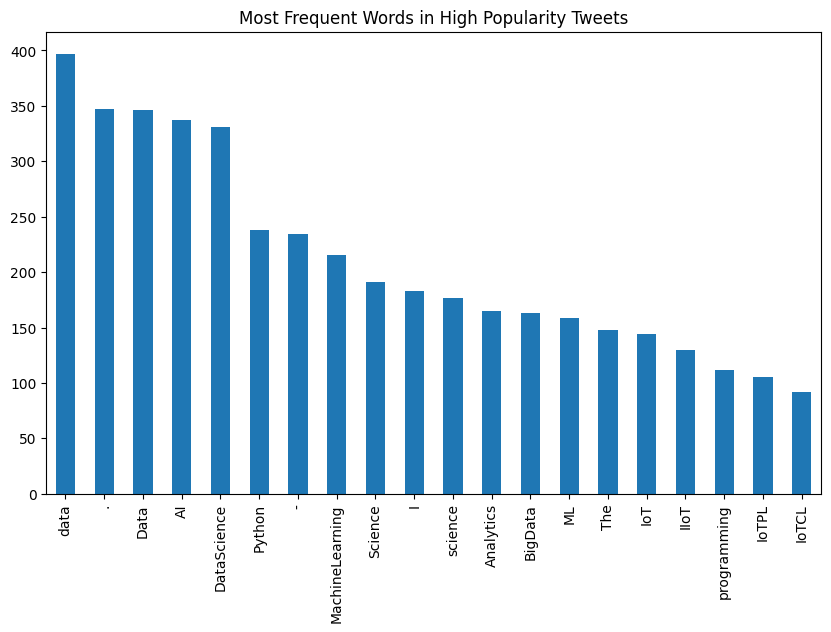

In [57]:
# visualizing the most frequent words in the tweets with high popularity
plt.figure(figsize=(10, 6))
high_pop_freq.plot(kind='bar', title="Most Frequent Words in High Popularity Tweets")
plt.show()

As we see above there are some words that are common in both low and high popularity tweets. Lets see them

In [58]:
common_words = set(low_pop_freq.index).intersection(set(high_pop_freq.index))
common_words

{'-',
 '.',
 'AI',
 'Analytics',
 'Data',
 'DataScience',
 'I',
 'MachineLearning',
 'Python',
 'Science',
 'The',
 'data',
 'science'}

<ipython-input-59-b2f06c9b7f39>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


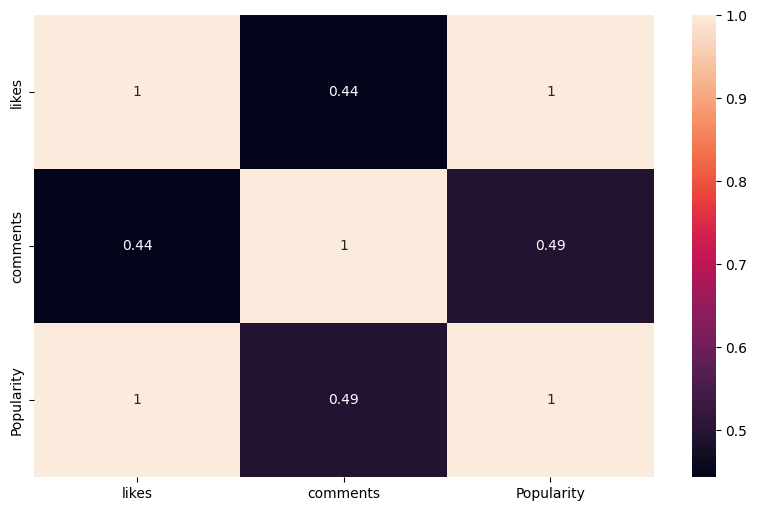

In [59]:
# heatmap of the correlation between numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

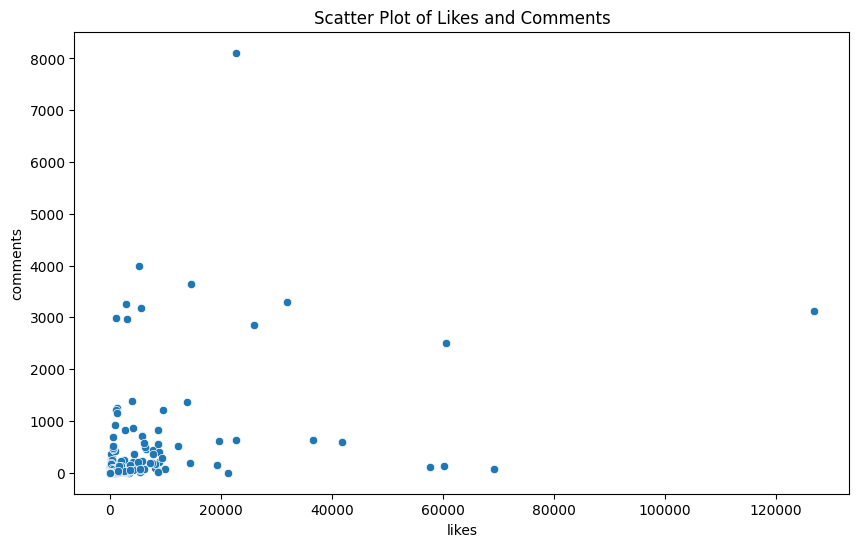

In [60]:
# scatter plot of 'likes' and 'comments'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='likes', y='comments', data=df)
plt.title("Scatter Plot of Likes and Comments")
plt.show()

As we see above there is a circler area where most of the data points are located. Lets zoom in to that area

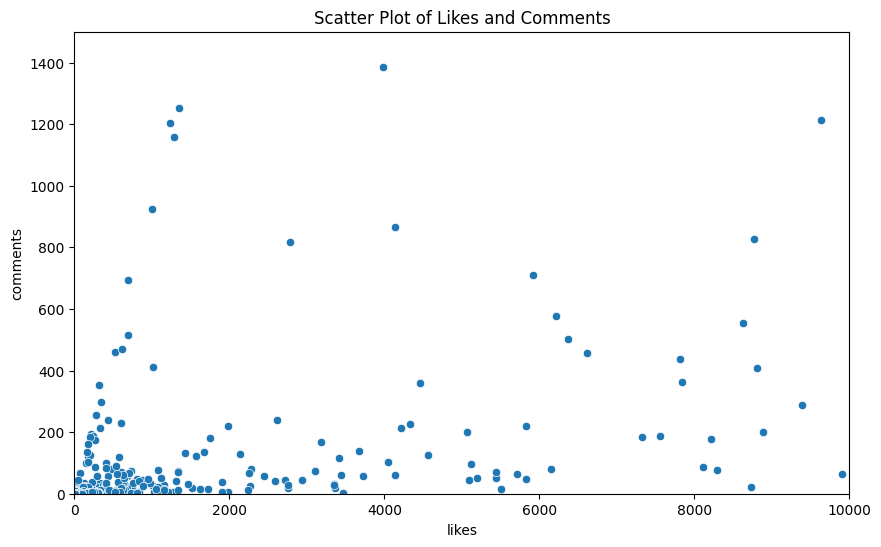

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='likes', y='comments', data=df)
plt.title("Scatter Plot of Likes and Comments")
plt.xlim(0, 10000)
plt.ylim(0, 1500)
plt.show()

Scatter plot of 'likes' and 'comments' with different colors for each category. I zoomed in to see different categories clearly

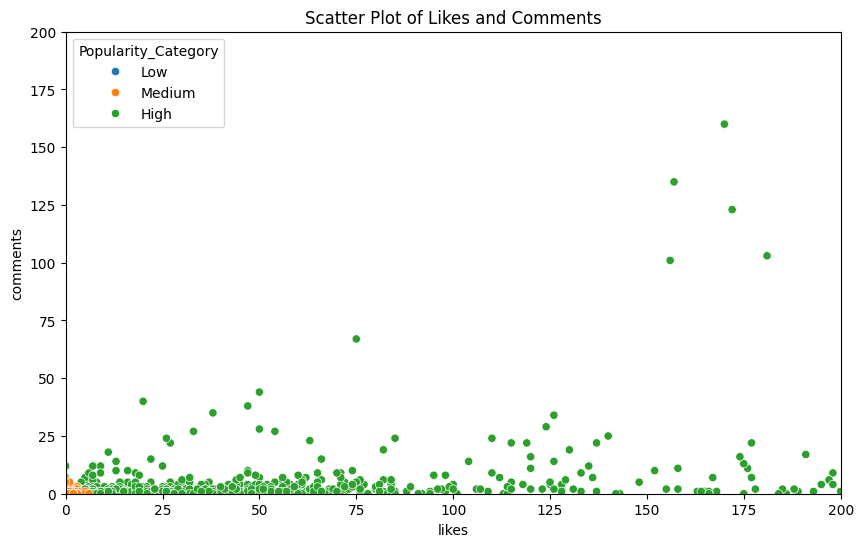

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='likes', y='comments', data=df, hue='Popularity_Category')
plt.title("Scatter Plot of Likes and Comments")
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.show()

We can see the above plot, most of the tweets are in the low popularity category. And there is also a linear relationship between 'likes' and 'comments'. Tweets with high likes also have high comments


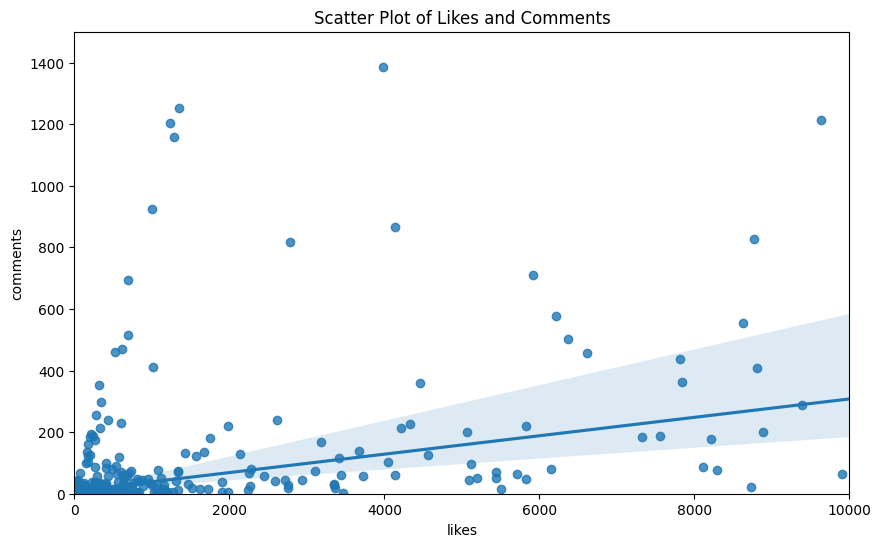

In [63]:
# if we show the scatter plot of 'likes' and 'comments' with regression line
# also some limits for better visualization
plt.figure(figsize=(10, 6))
sns.regplot(x='likes', y='comments', data=df)
plt.title("Scatter Plot of Likes and Comments")
plt.xlim(0, 10000)
plt.ylim(0, 1500)
plt.show()

# Sentiment Analysis

In [64]:
%pip install textblob

In [65]:
# import for sentiment analysis
from textblob import TextBlob

Subjectivity is between 0 and 1: 0 means objective and 1 means subjective

Polarity is between -1 and 1: -1 means negative and 1 means positive

In [67]:
# sentiment analysis of the first 10 tweets in the dataset for showing how it works
for i in range(10):
    print(df['text'][i])
    print("Subjectivity: ", TextBlob(df['text'][i]).sentiment.subjectivity)
    print("Polarity: ", TextBlob(df['text'][i]).sentiment.polarity)
    print()


Developers Huge Road Maps Collections  Just for free !!  You will get  Ai data Scientist Android Angular Asp net core AWS Backend Blockchain Code review Computer Science CPP Cyber Security Design System DevOps Docker Flutter Frontend Full Stack Game developer Golang Graphql Java JavaScript Kubernetes MongoDB Nodejs PostgreSQL dba Prompt Engineering Python Qa React  React Native Rust Server side game dev Software Architecture Software design Architecture Spring Boot SQL System Design Technical Writer Typescript UX Design Vue  Simply: . Follow HarsaDash (so I can DM) . Like and Repost . Comment  Roadmaps  To Received 
Subjectivity:  0.43839285714285714
Polarity:  0.071875

Are you struggling for paying huge amount on paid course  I'm giving you access   FREE Courses   . Artificial Intelligence . Machine Learning  . Cloud Computing . Ethical Hacking . Data Analytics   . AWS Certified . Data Science . BIG DATA  . Python  . MBA   To get, just: - Like  Retweet           - Comment "Free"     

In [68]:
# sentiment analysis of all tweets in the dataset
df['Polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df.head()


,date,username,text,likes,comments,Popularity,Popularity_Category,Month,text-withoutstopwords,Polarity,Subjectivity
0,2024-01-18 04:11:00,Harsa_Dash,Developers Huge Road Maps Collections Just fo...,274,256,530,High,2024-01,Developers Huge Road Maps Collections Just fre...,0.071875,0.438393
1,2024-01-17 05:06:00,atulkumarzz,Are you struggling for paying huge amount on p...,695,695,1390,High,2024-01,Are struggling paying huge amount paid course ...,0.114286,0.614286
2,2024-01-17 15:13:00,clcoding,Duke University is offering FREE courses Co...,1271,5,1276,High,2024-01,Duke University offering FREE courses Computer...,0.433333,0.700000
3,2024-01-18 10:08:00,BioSScotland,Last chance to apply! This job advert closes...,0,0,0,Low,2024-01,Last chance apply! This job advert closes next...,0.025000,0.241667
4,2024-01-18 10:04:00,_IBSConsulting,"Thinking of taking a Data Science, Cybersecuri...",3,1,4,Medium,2024-01,"Thinking taking Data Science, Cybersecurity, C...",0.200000,0.433333


## Polarity

In [69]:
# function for categorizing polarity
def polarity(x):
    if x < 0:
        return 'Negative'
    elif x == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [70]:
# categorizing polarity
df['Polarity_Category'] = df['Polarity'].apply(polarity)
df.head()

,date,username,text,likes,comments,Popularity,Popularity_Category,Month,text-withoutstopwords,Polarity,Subjectivity,Polarity_Category
0,2024-01-18 04:11:00,Harsa_Dash,Developers Huge Road Maps Collections Just fo...,274,256,530,High,2024-01,Developers Huge Road Maps Collections Just fre...,0.071875,0.438393,Positive
1,2024-01-17 05:06:00,atulkumarzz,Are you struggling for paying huge amount on p...,695,695,1390,High,2024-01,Are struggling paying huge amount paid course ...,0.114286,0.614286,Positive
2,2024-01-17 15:13:00,clcoding,Duke University is offering FREE courses Co...,1271,5,1276,High,2024-01,Duke University offering FREE courses Computer...,0.433333,0.700000,Positive
3,2024-01-18 10:08:00,BioSScotland,Last chance to apply! This job advert closes...,0,0,0,Low,2024-01,Last chance apply! This job advert closes next...,0.025000,0.241667,Positive
4,2024-01-18 10:04:00,_IBSConsulting,"Thinking of taking a Data Science, Cybersecuri...",3,1,4,Medium,2024-01,"Thinking taking Data Science, Cybersecurity, C...",0.200000,0.433333,Positive


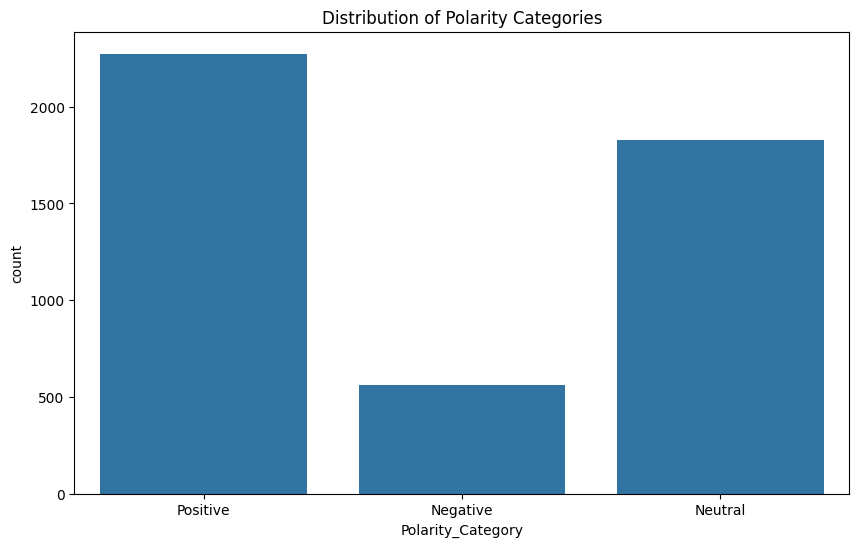

In [71]:
# plotting the distribution of polarity categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Polarity_Category', data=df)
plt.title("Distribution of Polarity Categories")
plt.show()


As we see above most of the tweets are are positive polarity. Lets see the distribution of polarity categories for each popularity category

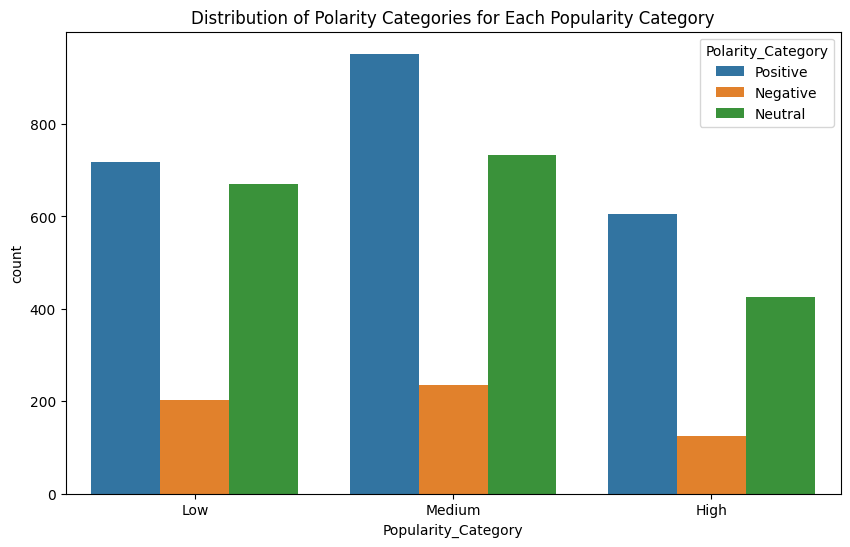

In [72]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Popularity_Category', data=df, hue='Polarity_Category')
plt.title("Distribution of Polarity Categories for Each Popularity Category")
plt.show()

And also the positive tweet count is peek on Medium popularity

## Subjectivity

In [73]:
# function for categorizing subjectivity
def subjectivity(x):
    if x < 0.5:
        return 'Objective'
    else:
        return 'Subjective'

In [74]:
# categorizing subjectivity
df['Subjectivity_Category'] = df['Subjectivity'].apply(subjectivity)
df.head()

,date,username,text,likes,comments,Popularity,Popularity_Category,Month,text-withoutstopwords,Polarity,Subjectivity,Polarity_Category,Subjectivity_Category
0,2024-01-18 04:11:00,Harsa_Dash,Developers Huge Road Maps Collections Just fo...,274,256,530,High,2024-01,Developers Huge Road Maps Collections Just fre...,0.071875,0.438393,Positive,Objective
1,2024-01-17 05:06:00,atulkumarzz,Are you struggling for paying huge amount on p...,695,695,1390,High,2024-01,Are struggling paying huge amount paid course ...,0.114286,0.614286,Positive,Subjective
2,2024-01-17 15:13:00,clcoding,Duke University is offering FREE courses Co...,1271,5,1276,High,2024-01,Duke University offering FREE courses Computer...,0.433333,0.700000,Positive,Subjective
3,2024-01-18 10:08:00,BioSScotland,Last chance to apply! This job advert closes...,0,0,0,Low,2024-01,Last chance apply! This job advert closes next...,0.025000,0.241667,Positive,Objective
4,2024-01-18 10:04:00,_IBSConsulting,"Thinking of taking a Data Science, Cybersecuri...",3,1,4,Medium,2024-01,"Thinking taking Data Science, Cybersecurity, C...",0.200000,0.433333,Positive,Objective


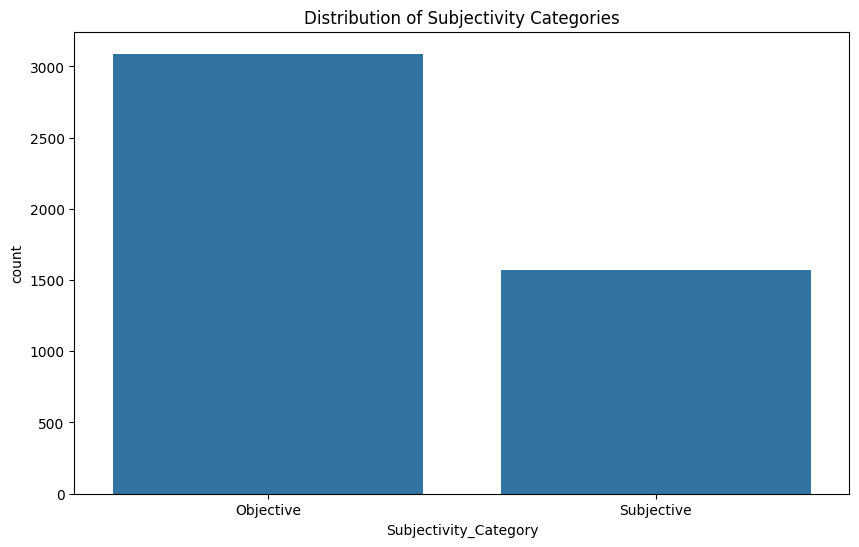

In [75]:
# plotting the distribution of subjectivity categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Subjectivity_Category', data=df)
plt.title("Distribution of Subjectivity Categories")
plt.show()

As we see above most of the tweets are objective. Lets see the distribution of subjectivity categories for each popularity category

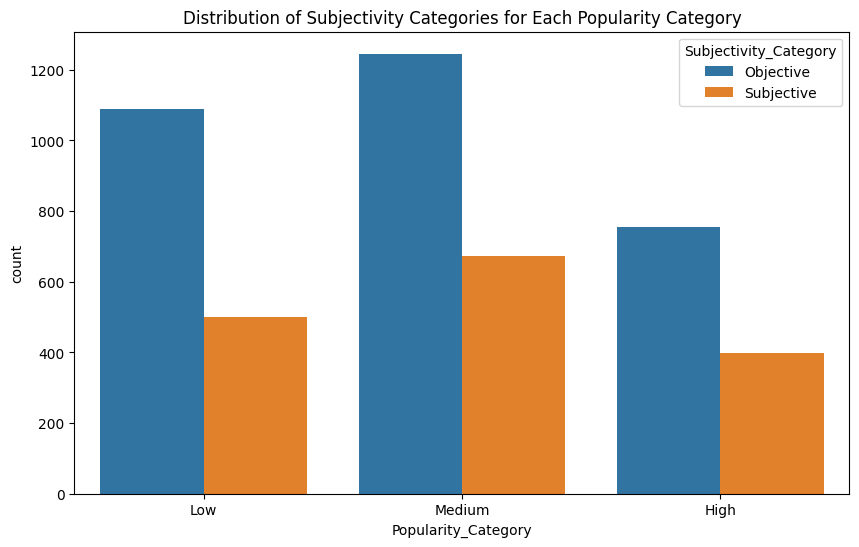

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Popularity_Category', data=df, hue='Subjectivity_Category')
plt.title("Distribution of Subjectivity Categories for Each Popularity Category")
plt.show()

And also the objective tweet count is peek on Medium popularity

In [78]:
# function for categorizing polarity and subjectivity
def sentiment(x):

    if x['Polarity_Category'] == 'Positive' and x['Subjectivity_Category'] == 'Subjective':
        return 'Positive Subjective'
    elif x['Polarity_Category'] == 'Positive' and x['Subjectivity_Category'] == 'Objective':
        return 'Positive Objective'
    elif x['Polarity_Category'] == 'Negative' and x['Subjectivity_Category'] == 'Subjective':
        return 'Negative Subjective'
    elif x['Polarity_Category'] == 'Negative' and x['Subjectivity_Category'] == 'Objective':
        return 'Negative Objective'
    elif x['Polarity_Category'] == 'Neutral' and x['Subjectivity_Category'] == 'Subjective':
        return 'Neutral Subjective'
    elif x['Polarity_Category'] == 'Neutral' and x['Subjectivity_Category'] == 'Objective':
        return 'Neutral Objective'

In [79]:
df['Sentiment'] = df.apply(sentiment, axis=1)
df.head()

,date,username,text,likes,comments,Popularity,Popularity_Category,Month,text-withoutstopwords,Polarity,Subjectivity,Polarity_Category,Subjectivity_Category,Sentiment
0,2024-01-18 04:11:00,Harsa_Dash,Developers Huge Road Maps Collections Just fo...,274,256,530,High,2024-01,Developers Huge Road Maps Collections Just fre...,0.071875,0.438393,Positive,Objective,Positive Objective
1,2024-01-17 05:06:00,atulkumarzz,Are you struggling for paying huge amount on p...,695,695,1390,High,2024-01,Are struggling paying huge amount paid course ...,0.114286,0.614286,Positive,Subjective,Positive Subjective
2,2024-01-17 15:13:00,clcoding,Duke University is offering FREE courses Co...,1271,5,1276,High,2024-01,Duke University offering FREE courses Computer...,0.433333,0.700000,Positive,Subjective,Positive Subjective
3,2024-01-18 10:08:00,BioSScotland,Last chance to apply! This job advert closes...,0,0,0,Low,2024-01,Last chance apply! This job advert closes next...,0.025000,0.241667,Positive,Objective,Positive Objective
4,2024-01-18 10:04:00,_IBSConsulting,"Thinking of taking a Data Science, Cybersecuri...",3,1,4,Medium,2024-01,"Thinking taking Data Science, Cybersecurity, C...",0.200000,0.433333,Positive,Objective,Positive Objective


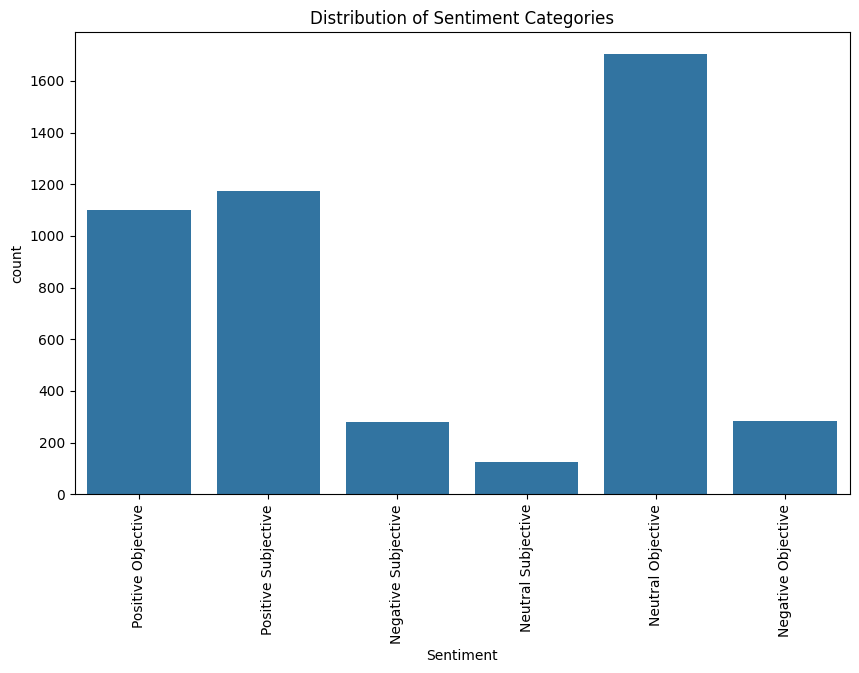

In [80]:
# plotting the distribution of sentiment categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df)
plt.title("Distribution of Sentiment Categories")
plt.xticks(rotation=90)
plt.show()

As we see above the most of the tweets are neutral objective. Lets see the distribution of sentiment categories for each popularity category

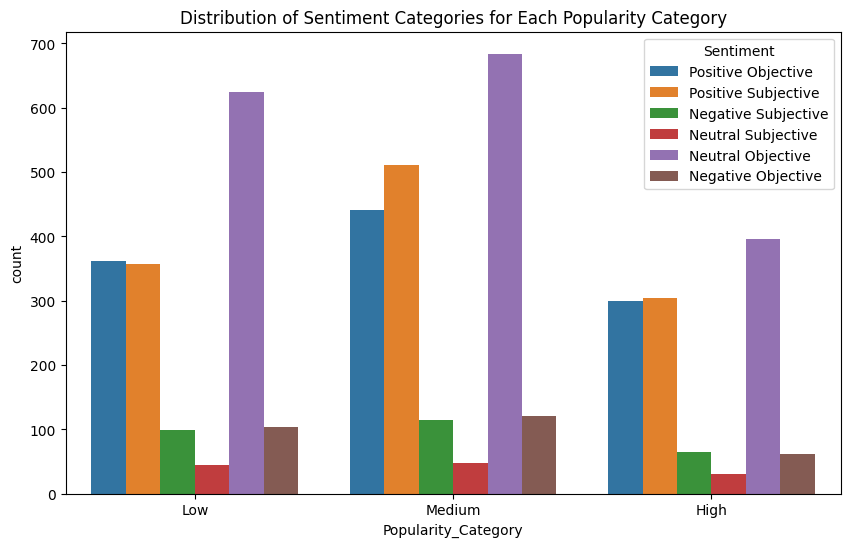

In [81]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Popularity_Category', data=df, hue='Sentiment')
plt.title("Distribution of Sentiment Categories for Each Popularity Category")
plt.show()

And also the Neutral Objective tweet count is peek on Medium popularity